<a href="https://colab.research.google.com/github/rosegebhardt/Frequentist-ML/blob/master/random_forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#----------INCLUDE PACKAGES

import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#----------DATA READING 

data = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv'
dataframe = pd.read_csv(data, sep=',', header='infer')

In [3]:
#----------CLEAN DATA

# Drop rows with missing data
clean_data = dataframe.dropna(axis=0)

# Show data information                    
clean_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
#----------SEPARATE DATA

# Choose seed
np.random.seed(420)

# Separate training and testing data
train_data = clean_data.sample(frac=0.8)
test_data = clean_data.drop(train_data.index)

# Separate training inputs and outputs
x_train = train_data.drop(['species'], axis=1)  
y_train = train_data['species']

# Separate testing inputs and outputs
x_test = test_data.drop(['species'], axis=1)
y_test = test_data['species']

# Normalize testing validation and training inputs
x_train = (x_train-x_train.min())/(x_train.max()-x_train.min()) 
x_test = (x_test-x_test.min())/(x_test.max()-x_test.min()) 

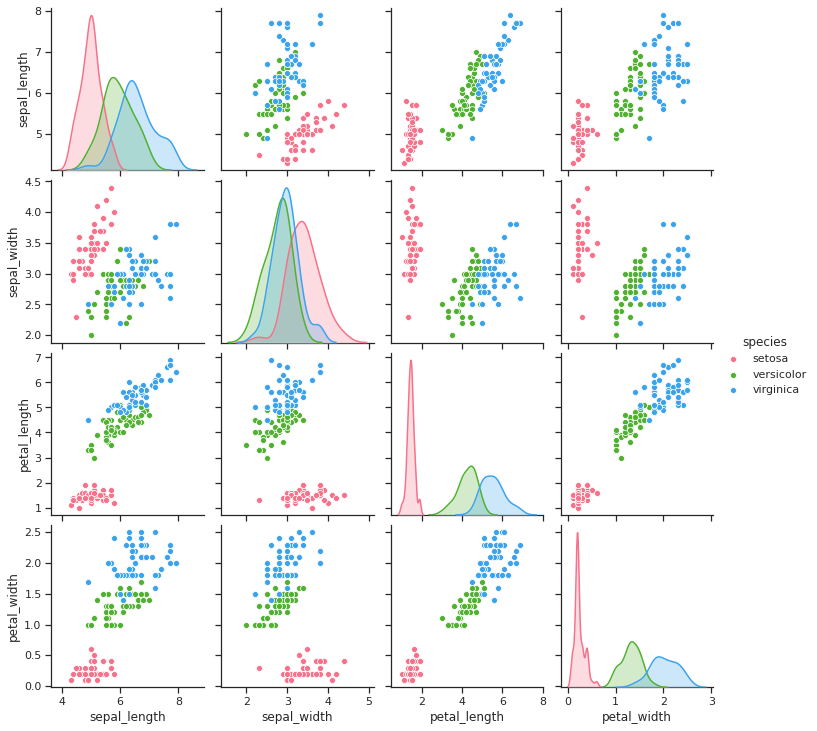

In [5]:
#----------VISUALIZE DATA

sns.set(style="ticks", color_codes=True)
sns.pairplot(clean_data, hue='species', palette="husl") 

In [6]:
#----------RANDOM FOREST CLASSIFIER

# Fit a model from the training data
clf = RandomForestClassifier(n_estimators=2)
clf.fit(x_train,y_train)

# Get predictions and determine accuracy
pred = clf.predict(x_test)
accuracy = sum(pred == y_test)/len(y_test)
percent_acc = 100*accuracy
print("The accuracy on the test set is using random forests is", percent_acc, "%.")
print(clf.feature_importances_)

The accuracy on the test set is using random forests is 86.66666666666667 %.
[0.01001242 0.00962979 0.57851702 0.40184078]


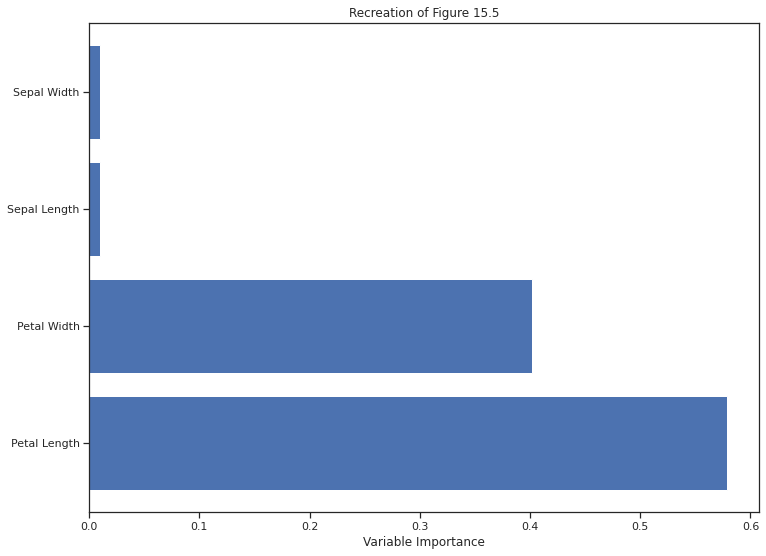

In [7]:
#----------PLOT FEATURE IMPORTANCES

# Get names and relative impoortances
names = ['Sepal Length','Sepal Width','Petal Length','Petal Width']
importance = clf.feature_importances_

# Sort by feature importance
indices = np.argsort(-importance)

# Recreate Figure 15.5
fig  = plt.figure(figsize = (12,9))
plt.barh(range(len(indices)), importance[indices])
plt.yticks(range(len(indices)), [names[i] for i in indices])
plt.xlabel('Variable Importance')
plt.title('Recreation of Figure 15.5')
plt.show()